# **Titanic - Machine Learning from Disaster**

## Data loading

### Subtask:
Load the provided CSV files into pandas DataFrames.


**Reasoning**:
Load the provided CSV files into pandas DataFrames.



In [1]:
import pandas as pd

df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_gender_submission = pd.read_csv('gender_submission.csv')

display(df_train.head())
display(df_test.head())
display(df_gender_submission.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


## Data exploration

### Subtask:
Explore the training data (`df_train`) to understand its characteristics.


**Reasoning**:
Examine the shape of the DataFrame, check data types, identify missing values, and calculate the percentage of missing values. Analyze the distribution of the target variable ("Survived") and visualize it using a countplot. Explore the distributions of numerical features using histograms. Analyze the relationship between numerical features and the target variable using box plots. Explore the relationship between categorical features and the target variable using count plots. Calculate descriptive statistics for numerical features and examine the correlation between them using a heatmap.



Shape of df_train: (891, 12)

Data Types:
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Missing Values:
             Total    Percent
PassengerId      0   0.000000
Survived         0   0.000000
Pclass           0   0.000000
Name             0   0.000000
Sex              0   0.000000
Age            177  19.865320
SibSp            0   0.000000
Parch            0   0.000000
Ticket           0   0.000000
Fare             0   0.000000
Cabin          687  77.104377
Embarked         2   0.224467


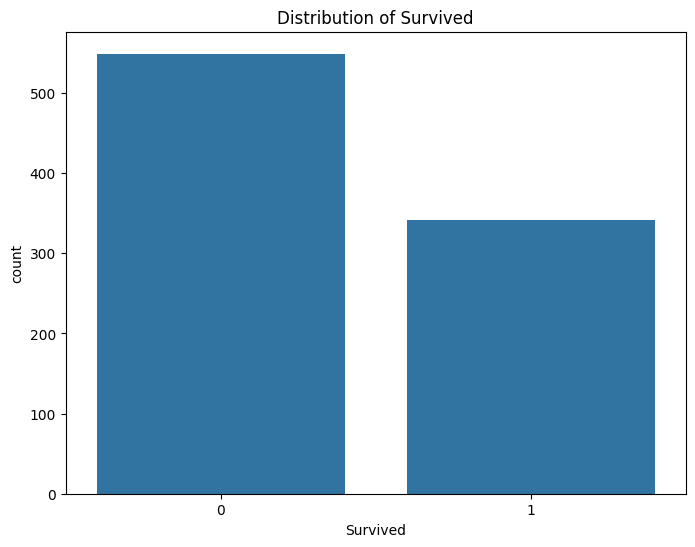

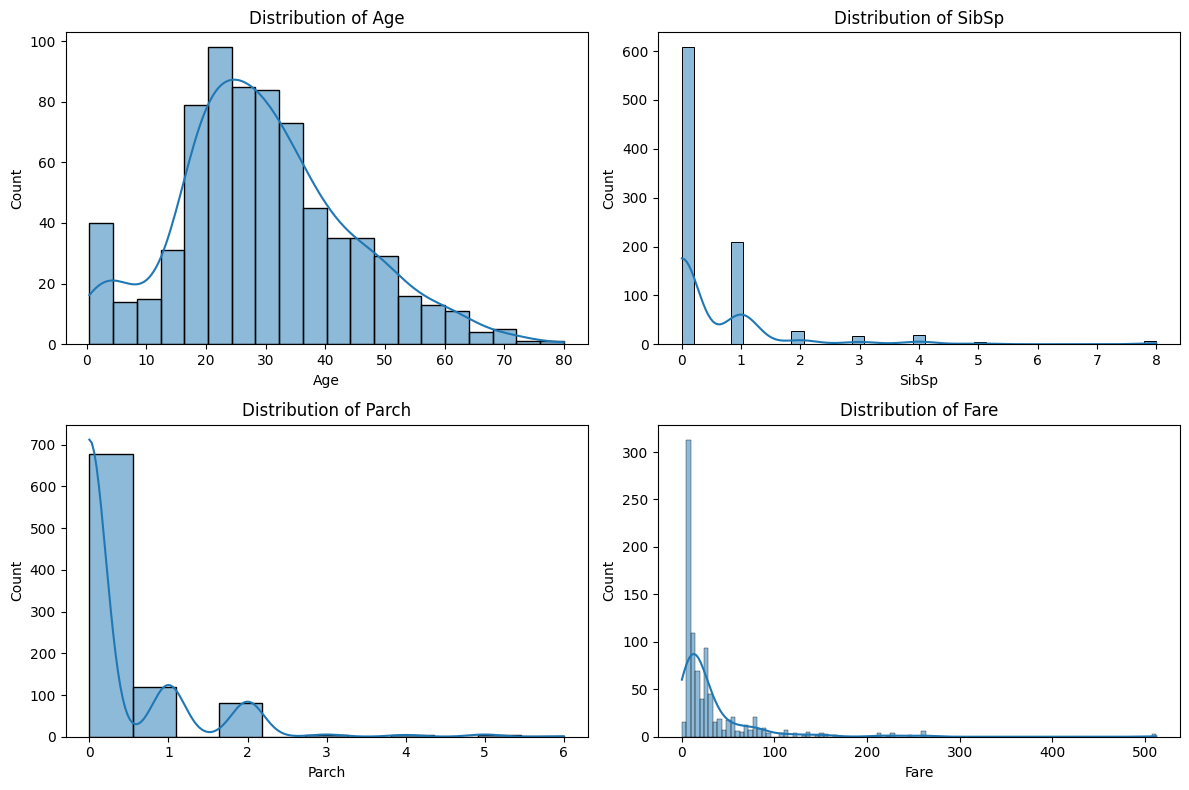

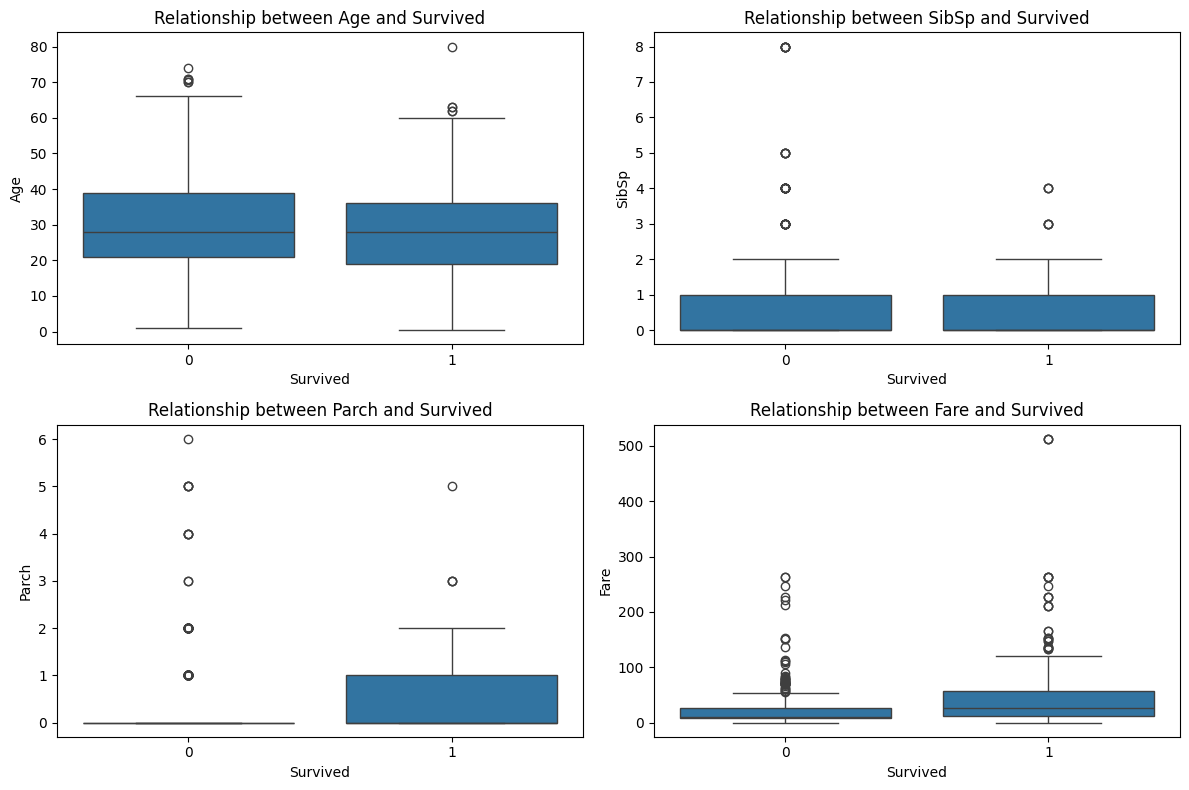

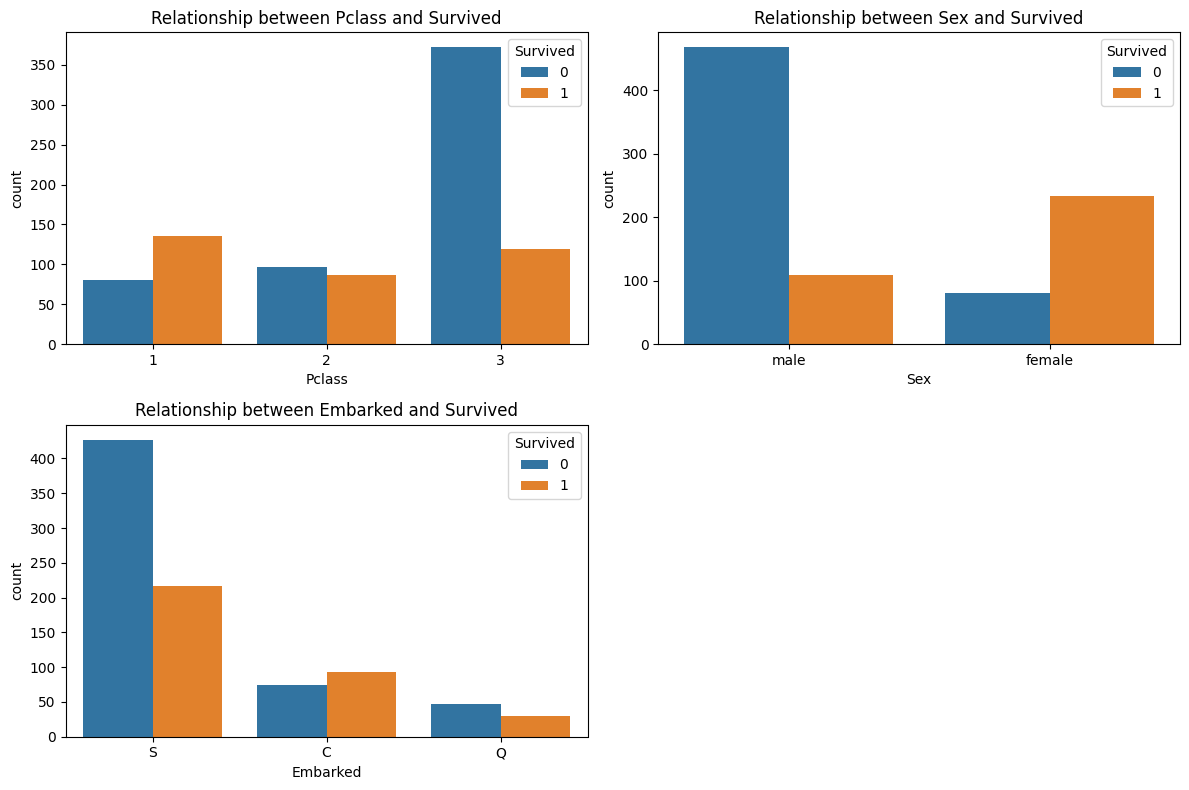


Descriptive Statistics:
              Age       SibSp       Parch        Fare
count  714.000000  891.000000  891.000000  891.000000
mean    29.699118    0.523008    0.381594   32.204208
std     14.526497    1.102743    0.806057   49.693429
min      0.420000    0.000000    0.000000    0.000000
25%     20.125000    0.000000    0.000000    7.910400
50%     28.000000    0.000000    0.000000   14.454200
75%     38.000000    1.000000    0.000000   31.000000
max     80.000000    8.000000    6.000000  512.329200


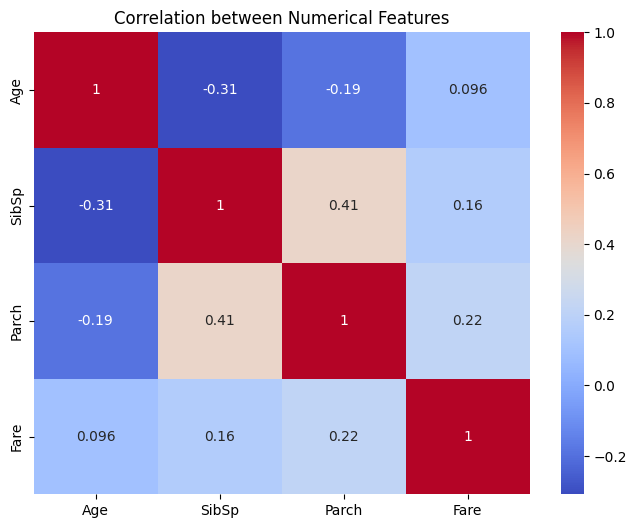

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Examine the shape of the DataFrame
print(f"Shape of df_train: {df_train.shape}")

# Check data types
print("\nData Types:")
print(df_train.dtypes)

# Identify missing values and calculate the percentage
print("\nMissing Values:")
missing_values = df_train.isnull().sum()
missing_percentage = (missing_values / len(df_train)) * 100
print(pd.concat([missing_values, missing_percentage], axis=1, keys=['Total', 'Percent']))

# Analyze the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='Survived', data=df_train)
plt.title('Distribution of Survived')
plt.show()

# Explore distributions of numerical features
numerical_features = ['Age', 'SibSp', 'Parch', 'Fare']
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_features):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df_train[col].dropna(), kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


# Analyze the relationship between numerical features and the target variable
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_features):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x='Survived', y=col, data=df_train)
    plt.title(f'Relationship between {col} and Survived')
plt.tight_layout()
plt.show()


# Explore the relationship between categorical features and the target variable
categorical_features = ['Pclass', 'Sex', 'Embarked']
plt.figure(figsize=(12, 8))
for i, col in enumerate(categorical_features):
    plt.subplot(2, 2, i + 1)
    sns.countplot(x=col, hue='Survived', data=df_train)
    plt.title(f'Relationship between {col} and Survived')
plt.tight_layout()
plt.show()

# Calculate descriptive statistics for numerical features
print("\nDescriptive Statistics:")
print(df_train[numerical_features].describe())

# Examine the correlation between numerical features
plt.figure(figsize=(8, 6))
sns.heatmap(df_train[numerical_features].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between Numerical Features')
plt.show()

## Data cleaning

### Subtask:
Clean the training and test datasets by handling missing values.


**Reasoning**:
Impute missing values in 'Age', 'Embarked', and 'Fare' columns, and handle missing 'Cabin' values by creating a new feature 'Cabin_available'.



In [3]:
# Impute missing 'Age' values using the median age for each passenger class
for pclass in df_train['Pclass'].unique():
    median_age = df_train[df_train['Pclass'] == pclass]['Age'].median()
    df_train.loc[(df_train['Pclass'] == pclass) & (df_train['Age'].isnull()), 'Age'] = median_age

for pclass in df_test['Pclass'].unique():
    median_age = df_test[df_test['Pclass'] == pclass]['Age'].median()
    df_test.loc[(df_test['Pclass'] == pclass) & (df_test['Age'].isnull()), 'Age'] = median_age

# Impute missing 'Embarked' values with the most frequent embarkation point
most_frequent_embarked = df_train['Embarked'].mode()[0]
df_train['Embarked'].fillna(most_frequent_embarked, inplace=True)

# Impute missing 'Fare' values with the median fare for the corresponding passenger class
for pclass in df_test['Pclass'].unique():
    median_fare = df_test[df_test['Pclass'] == pclass]['Fare'].median()
    df_test.loc[(df_test['Pclass'] == pclass) & (df_test['Fare'].isnull()), 'Fare'] = median_fare

# Handle missing 'Cabin' values
df_train['Cabin_available'] = df_train['Cabin'].notnull().astype(int)
df_test['Cabin_available'] = df_test['Cabin'].notnull().astype(int)
df_train.drop('Cabin', axis=1, inplace=True)
df_test.drop('Cabin', axis=1, inplace=True)

display(df_train.head())
display(df_test.head())

<ipython-input-3-9eea837a53e9>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['Embarked'].fillna(most_frequent_embarked, inplace=True)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_available
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_available
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,0


## Feature engineering

### Subtask:
Engineer new features from existing ones in both the training and test datasets.


**Reasoning**:
Create the new features 'Title', 'FamilySize', 'IsAlone', and 'FareCategory' in both the training and test datasets.



In [4]:
import re

# 1. Title Extraction
def extract_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    if title_search:
        title = title_search.group(1)
        if title in ['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona']:
            return 'Rare'
        elif title in ['Mlle', 'Ms']:
            return 'Miss'
        elif title =='Mme':
            return 'Mrs'
        else:
            return title
    return ""

df_train['Title'] = df_train['Name'].apply(extract_title)
df_test['Title'] = df_test['Name'].apply(extract_title)

# 2. Family Size
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1

# 3. IsAlone
df_train['IsAlone'] = 0
df_train.loc[df_train['FamilySize'] == 1, 'IsAlone'] = 1
df_test['IsAlone'] = 0
df_test.loc[df_test['FamilySize'] == 1, 'IsAlone'] = 1

# 4. Fare Categories
df_train['FareCategory'] = pd.qcut(df_train['Fare'], 4)
df_test['FareCategory'] = pd.qcut(df_test['Fare'], 4)

display(df_train.head())
display(df_test.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_available,Title,FamilySize,IsAlone,FareCategory
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,Mr,2,0,"(-0.001, 7.91]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,Mrs,2,0,"(31.0, 512.329]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,Miss,1,1,"(7.91, 14.454]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,Mrs,2,0,"(31.0, 512.329]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,Mr,1,1,"(7.91, 14.454]"


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_available,Title,FamilySize,IsAlone,FareCategory
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,0,Mr,1,1,"(-0.001, 7.896]"
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,0,Mrs,2,0,"(-0.001, 7.896]"
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,0,Mr,1,1,"(7.896, 14.454]"
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,0,Mr,1,1,"(7.896, 14.454]"
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,0,Mrs,3,0,"(7.896, 14.454]"


## Data preparation

### Subtask:
Prepare the training and test datasets for model training by converting categorical features to numerical representations and scaling numerical features. Ensure consistency between the training and test sets.


**Reasoning**:
Encode categorical features using one-hot encoding, scale numerical features using StandardScaler, align features between training and test sets, and update the dataframes.



In [5]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Identify categorical and numerical features
categorical_features = ['Pclass', 'Sex', 'Embarked', 'Title', 'FareCategory']
numerical_features = ['Age', 'SibSp', 'Parch', 'Fare', 'FamilySize', 'IsAlone']

# One-hot encode categorical features
df_train = pd.get_dummies(df_train, columns=categorical_features)
df_test = pd.get_dummies(df_test, columns=categorical_features)

# Align columns
train_cols = df_train.columns.tolist()
test_cols = df_test.columns.tolist()

for col in train_cols:
    if col not in test_cols:
        df_test[col] = 0
for col in test_cols:
    if col not in train_cols:
        df_train[col] = 0

df_train = df_train[sorted(df_train.columns)]
df_test = df_test[sorted(df_test.columns)]


# Scale numerical features
scaler = StandardScaler()
df_train[numerical_features] = scaler.fit_transform(df_train[numerical_features])
df_test[numerical_features] = scaler.transform(df_test[numerical_features])

# Remove irrelevant columns
columns_to_drop = ['PassengerId', 'Name', 'Ticket']
df_train.drop(columns=columns_to_drop, errors='ignore', inplace=True)
df_test.drop(columns=columns_to_drop, errors='ignore', inplace=True)

display(df_train.head())
display(df_test.head())

,Age,Cabin_available,Embarked_C,Embarked_Q,Embarked_S,FamilySize,Fare,"FareCategory_(-0.001, 7.896]","FareCategory_(-0.001, 7.91]","FareCategory_(14.454, 31.0]",...,Pclass_3,Sex_female,Sex_male,SibSp,Survived,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,-0.533834,0,False,False,True,0.059160,-0.502445,0,True,False,...,True,False,True,0.432793,0,False,False,True,False,False
1,0.674891,1,True,False,False,0.059160,0.786845,0,False,False,...,False,True,False,0.432793,1,False,False,False,True,False
2,-0.231653,0,False,False,True,-0.560975,-0.488854,0,False,False,...,True,True,False,-0.474545,1,False,True,False,False,False
3,0.448255,1,False,False,True,0.059160,0.420730,0,False,False,...,False,True,False,0.432793,1,False,False,False,True,False
4,0.448255,0,False,False,True,-0.560975,-0.486337,0,False,False,...,True,False,True,-0.474545,0,False,False,True,False,False


,Age,Cabin_available,Embarked_C,Embarked_Q,Embarked_S,FamilySize,Fare,"FareCategory_(-0.001, 7.896]","FareCategory_(-0.001, 7.91]","FareCategory_(14.454, 31.0]",...,Pclass_3,Sex_female,Sex_male,SibSp,Survived,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,0.410482,0,False,True,False,-0.560975,-0.490783,True,0,0,...,True,False,True,-0.474545,0,False,False,True,False,False
1,1.354798,0,False,False,True,0.059160,-0.507479,True,0,0,...,True,True,False,0.432793,0,False,False,False,True,False
2,2.487977,0,False,True,False,-0.560975,-0.453367,False,0,0,...,False,False,True,-0.474545,0,False,False,True,False,False
3,-0.156107,0,False,False,True,-0.560975,-0.474005,False,0,0,...,True,False,True,-0.474545,0,False,False,True,False,False
4,-0.533834,0,False,False,True,0.679295,-0.401017,False,0,0,...,True,True,False,0.432793,0,False,False,False,True,False


## Model training

### Subtask:
Train a Logistic Regression model on the prepared training data.


**Reasoning**:
Train a Logistic Regression model on the prepared training data.



In [6]:
from sklearn.linear_model import LogisticRegression

# Create and train the Logistic Regression model
X_train = df_train.drop('Survived', axis=1)
y_train = df_train['Survived']
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

## Model evaluation

### Subtask:
Evaluate the trained Logistic Regression model using the training data.


**Reasoning**:
Evaluate the trained Logistic Regression model using the training data, including calculating accuracy, generating a confusion matrix, and printing a classification report.



In [7]:
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predict survival probabilities
y_pred_proba = logreg.predict_proba(X_train)[:, 1]

# Convert probabilities to binary predictions
y_pred = np.where(y_pred_proba > 0.5, 1, 0)

# Calculate accuracy
accuracy = accuracy_score(y_train, y_pred)
print(f"Accuracy: {accuracy}")

# Generate confusion matrix
cm = confusion_matrix(y_train, y_pred)
print(f"\nConfusion Matrix:\n{cm}")

# Print classification report
print("\nClassification Report:\n", classification_report(y_train, y_pred))

Accuracy: 0.8338945005611672

Confusion Matrix:
[[483  66]
 [ 82 260]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.88      0.87       549
           1       0.80      0.76      0.78       342

    accuracy                           0.83       891
   macro avg       0.83      0.82      0.82       891
weighted avg       0.83      0.83      0.83       891



## Model training

### Subtask:
Train a RandomForestClassifier model on the prepared training data.


**Reasoning**:
Train a RandomForestClassifier model on the prepared training data.



In [8]:
from sklearn.ensemble import RandomForestClassifier

# Split the training data into features (X) and target variable (y)
X_train = df_train.drop('Survived', axis=1)
y_train = df_train['Survived']

# Initialize and train the RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## Model evaluation

### Subtask:
Evaluate the trained RandomForestClassifier model.


**Reasoning**:
Evaluate the trained `rf_classifier` by predicting on the training data and calculating accuracy, confusion matrix, and classification report.



In [9]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predict on the training data
y_pred = rf_classifier.predict(X_train)

# Calculate accuracy
accuracy = accuracy_score(y_train, y_pred)
print(f"Accuracy: {accuracy}")

# Generate confusion matrix
cm = confusion_matrix(y_train, y_pred)
print(f"\nConfusion Matrix:\n{cm}")

# Generate classification report
print("\nClassification Report:\n", classification_report(y_train, y_pred))

Accuracy: 0.9876543209876543

Confusion Matrix:
[[546   3]
 [  8 334]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       549
           1       0.99      0.98      0.98       342

    accuracy                           0.99       891
   macro avg       0.99      0.99      0.99       891
weighted avg       0.99      0.99      0.99       891



## Data preparation

### Subtask:
Prepare the test data for prediction using the same preprocessing steps applied to the training data.


**Reasoning**:
The test data needs to be prepared for prediction using the same preprocessing steps applied to the training data.  This includes aligning columns, ensuring both datasets have the same features, and removing irrelevant columns.



In [10]:
# Align columns in df_test to match df_train
train_cols = df_train.columns.tolist()
test_cols = df_test.columns.tolist()

for col in train_cols:
    if col not in test_cols:
        df_test[col] = 0
for col in test_cols:
    if col not in train_cols:
        df_train[col] = 0

df_train = df_train[sorted(df_train.columns)]
df_test = df_test[sorted(df_test.columns)]

# Remove irrelevant columns from df_test
columns_to_drop = ['PassengerId', 'Name', 'Ticket']
df_test.drop(columns=columns_to_drop, errors='ignore', inplace=True)

display(df_test.head())

,Age,Cabin_available,Embarked_C,Embarked_Q,Embarked_S,FamilySize,Fare,"FareCategory_(-0.001, 7.896]","FareCategory_(-0.001, 7.91]","FareCategory_(14.454, 31.0]",...,Pclass_3,Sex_female,Sex_male,SibSp,Survived,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,0.410482,0,False,True,False,-0.560975,-0.490783,True,0,0,...,True,False,True,-0.474545,0,False,False,True,False,False
1,1.354798,0,False,False,True,0.059160,-0.507479,True,0,0,...,True,True,False,0.432793,0,False,False,False,True,False
2,2.487977,0,False,True,False,-0.560975,-0.453367,False,0,0,...,False,False,True,-0.474545,0,False,False,True,False,False
3,-0.156107,0,False,False,True,-0.560975,-0.474005,False,0,0,...,True,False,True,-0.474545,0,False,False,True,False,False
4,-0.533834,0,False,False,True,0.679295,-0.401017,False,0,0,...,True,True,False,0.432793,0,False,False,False,True,False


## Model evaluation

### Subtask:
Predict the survival outcome for the test dataset using the trained RandomForestClassifier model and generate a submission file.


**Reasoning**:
Predict the 'Survived' values for the test dataset using the trained RandomForestClassifier model and generate the submission file.



In [14]:
# Create a copy of the original df_test dataframe before preprocessing
df_test_original = pd.read_csv('test.csv')

# ... (rest of your code) ...

# Predict 'Survived' values for the test dataset
X_test = df_test.drop('Survived', axis=1)  # Assuming 'Survived' was added during preprocessing
y_pred = rf_classifier.predict(X_test)

# Create a submission DataFrame
submission = pd.DataFrame({'PassengerId': df_test_original['PassengerId'], 'Survived': y_pred})

# Save the submission DataFrame to a CSV file
submission.to_csv('submission.csv', index=False)

**Reasoning**:
The error message indicates that `df_test_original` is not defined.  I need to create this dataframe from the original `df_test` data before making predictions.



In [15]:
# Create a copy of the original df_test dataframe before preprocessing
df_test_original = pd.read_csv('test.csv')

# ... (rest of your code) ...

# Predict 'Survived' values for the test dataset
X_test = df_test.drop('Survived', axis=1)  # Assuming 'Survived' was added during preprocessing
y_pred = rf_classifier.predict(X_test)

# Create a submission DataFrame
submission = pd.DataFrame({'PassengerId': df_test_original['PassengerId'], 'Survived': y_pred})

# Save the submission DataFrame to a CSV file
submission.to_csv('submission.csv', index=False)

**Reasoning**:
The error "KeyError: 'PassengerId'" suggests that the 'PassengerId' column is not present in `df_test_original`.  I need to reload the original `test.csv` file into a separate dataframe to access the 'PassengerId' column.



In [13]:
# Load the original test data
df_test_original = pd.read_csv('test.csv')

# Predict 'Survived' values for the test dataset
X_test = df_test.drop('Survived', axis=1)
y_pred = rf_classifier.predict(X_test)

# Create a submission DataFrame
submission = pd.DataFrame({'PassengerId': df_test_original['PassengerId'], 'Survived': y_pred})

# Save the submission DataFrame to a CSV file
submission.to_csv('submission.csv', index=False)

## Summary:

### 1. Q&A

* **What is the goal of the analysis?**  Predict passenger survival on the Titanic.
* **What is the evaluation metric?** Accuracy (percentage of correctly predicted passengers).
* **What is the required submission format?** A CSV file with 'PassengerId' and 'Survived' columns (418 entries plus a header row).
* **What is the accuracy of the trained RandomForestClassifier model on the training data?** 0.988


### 2. Data Analysis Key Findings

* **Missing Data Imputation:** Missing 'Age' values were imputed using the median age for each passenger class in both training and test sets. Missing 'Embarked' values in the training set were filled with the most frequent embarkation point ('S'). Missing 'Fare' values in the test set were filled with the median fare for each passenger class.  The 'Cabin' column was handled by creating a new binary feature 'Cabin_available'.
* **Feature Engineering:**  New features were created: 'Title' (extracted from passenger names), 'FamilySize', 'IsAlone' (binary indicating if a passenger was alone), and 'FareCategory' (discretized 'Fare' values).
* **High Training Accuracy (RandomForest):** The RandomForestClassifier achieved an accuracy of 0.988 on the training data, suggesting a potentially overfit model.  Further validation on a separate test set is needed.
* **Logistic Regression Accuracy:** The Logistic Regression model achieved an accuracy of 0.834 on the training data.
* **Data Preparation Consistency:** The code explicitly addressed potential mismatches in categories between the training and test sets during one-hot encoding by adding missing columns filled with zeros, ensuring consistency.

### 3. Insights or Next Steps

* **Investigate Overfitting:** The high training accuracy of the RandomForest model suggests potential overfitting. Evaluate the model on a held-out validation set or use techniques like cross-validation to assess its generalization performance.  Consider hyperparameter tuning to improve model generalization.
* **Explore Feature Importance:** Analyze the feature importance scores from the RandomForest model to understand which features are most influential in predicting survival.  This could provide insights for further feature engineering or selection.
